In [1]:
import sys
from pathlib import Path
# Get the repository root (2 levels up from current notebook)
repo_root = Path(__file__).parent.parent.parent if '__file__' in globals() else Path.cwd().parent.parent
sys.path.insert(0, str(repo_root))

# import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import Template
# Definición de modulos

import torch
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

from imblearn.over_sampling  import SMOTE, ADASYN
from sklearn.ensemble        import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics         import confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score, recall_score, f1_score, precision_score
from sklearn.decomposition import PCA


Template = Template.Template()

# Build the path to the Excel file in the repository root
data_path = os.path.join(os.path.dirname(os.getcwd()), '..', 'Datos1_InteraccionesNIR.xlsx')

In [2]:
# Build the path to the Excel file in the repository root
data_path = os.path.join(repo_root, 'Datos1_InteraccionesNIR.xlsx')
# import the data from all sheets of the Excel file

df8 = pd.read_excel(data_path, sheet_name=8)


## Classification of Healthy plants vs Unhealthy plants

## SMOTE

In [3]:
# Make a new column 'Health_Status'
df = df8.copy()

# Drop the 'Planta ' column
df = df.drop(columns=['Planta'])

columns_idx = list(df.columns)[1:]

# Add 'Sana' column at the beginning (after 'Tratamiento' and 'Planta')
df.insert(1, 'Sana', df['Tratamiento'].apply(lambda x: 1 if x == 'Control' else 0))

df.head()

,Tratamiento,Sana,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Control,1,0.072192,0.070766,0.068898,0.070177,0.070751,0.069163,0.066091,0.061895,...,0.037518,0.037349,0.037174,0.036982,0.036810,0.036678,0.036522,0.036390,0.036325,0.036259
1,Control,1,0.067591,0.066504,0.062394,0.064414,0.065218,0.062667,0.059184,0.056857,...,0.036295,0.036133,0.035927,0.035787,0.035769,0.035591,0.035315,0.035172,0.035006,0.034910
2,Control,1,0.070397,0.072826,0.068396,0.069870,0.069444,0.065892,0.063225,0.059620,...,0.042210,0.042031,0.041820,0.041696,0.041635,0.041554,0.041572,0.041463,0.041264,0.041100
3,Control,1,0.067402,0.068393,0.065392,0.064802,0.065278,0.064587,0.060688,0.057554,...,0.036598,0.036503,0.036599,0.036504,0.036363,0.036201,0.035880,0.035724,0.035633,0.035613
4,Control,1,0.072992,0.073462,0.074921,0.074614,0.072073,0.069147,0.068576,0.064738,...,0.040637,0.040476,0.040205,0.040060,0.040038,0.039909,0.039751,0.039616,0.039468,0.039318


In [4]:
# Apply SMOTE to balance the dataset
X = df[columns_idx]
y = df['Sana']

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create balanced dataframe
df_balanced = pd.DataFrame(X_balanced, columns=columns_idx)
df_balanced.insert(0, 'Sana', y_balanced)

print(f"Original class distribution:\n{y.value_counts()}")
print(f"\nBalanced class distribution:\n{y_balanced.value_counts()}")
print(f"\nOriginal shape: {X.shape}, Balanced shape: {X_balanced.shape}")

df_balanced.head()

Original class distribution:
Sana
0    179
1     30
Name: count, dtype: int64

Balanced class distribution:
Sana
1    179
0    179
Name: count, dtype: int64

Original shape: (209, 2151), Balanced shape: (358, 2151)


C:\Users\ricar\AppData\Local\Temp\ipykernel_15684\2984401751.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


,Sana,350,351,352,353,354,355,356,357,358,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1,0.072192,0.070766,0.068898,0.070177,0.070751,0.069163,0.066091,0.061895,0.060201,...,0.037518,0.037349,0.037174,0.036982,0.036810,0.036678,0.036522,0.036390,0.036325,0.036259
1,1,0.067591,0.066504,0.062394,0.064414,0.065218,0.062667,0.059184,0.056857,0.056048,...,0.036295,0.036133,0.035927,0.035787,0.035769,0.035591,0.035315,0.035172,0.035006,0.034910
2,1,0.070397,0.072826,0.068396,0.069870,0.069444,0.065892,0.063225,0.059620,0.057853,...,0.042210,0.042031,0.041820,0.041696,0.041635,0.041554,0.041572,0.041463,0.041264,0.041100
3,1,0.067402,0.068393,0.065392,0.064802,0.065278,0.064587,0.060688,0.057554,0.055798,...,0.036598,0.036503,0.036599,0.036504,0.036363,0.036201,0.035880,0.035724,0.035633,0.035613
4,1,0.072992,0.073462,0.074921,0.074614,0.072073,0.069147,0.068576,0.064738,0.061751,...,0.040637,0.040476,0.040205,0.040060,0.040038,0.039909,0.039751,0.039616,0.039468,0.039318


In [5]:
# data treatment

# Data preparation for model production
df_X = df_balanced.drop(columns=['Sana'])

X = df_X.values  

y = df_balanced['Sana'].values

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Logistic Regression

In [6]:
# Define a more comprehensive parameter grid for hyperparameter tuning
param_grid = [
    # L1 regularization options
    {
        'PCA__n_components': [2],
        'model__penalty': ['l1'],
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['liblinear', 'saga'],
        'model__class_weight': [None, 'balanced']
    },
    # L2 regularization options
    {
        'PCA__n_components': [2],
        'model__penalty': ['l2'],
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['liblinear', 'saga', 'lbfgs'],
        'model__class_weight': [None, 'balanced']
    },
    # Elasticnet option (saga only)
    {
        'PCA__n_components': [2],
        'model__penalty': ['elasticnet'],
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['saga'],
        'model__l1_ratio': [0.2, 0.5, 0.8],
        'model__class_weight': [None, 'balanced']
    }
]

# Create a pipeline
pipeline = Pipeline([
    ('PCA', PCA()),
    ('model', LogisticRegression(max_iter=1000))
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
# Make predictions with the best model
y_pred_best = best_model.predict(X_test)
# Evaluate the best model
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))

Best Model Accuracy: 0.7870370370370371
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.67      0.76        54
           1       0.73      0.91      0.81        54

    accuracy                           0.79       108
   macro avg       0.80      0.79      0.78       108
weighted avg       0.80      0.79      0.78       108



In [7]:
# Parameter for the best model found
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'PCA__n_components': 2, 'model__C': 1, 'model__class_weight': None, 'model__penalty': 'l1', 'model__solver': 'liblinear'}


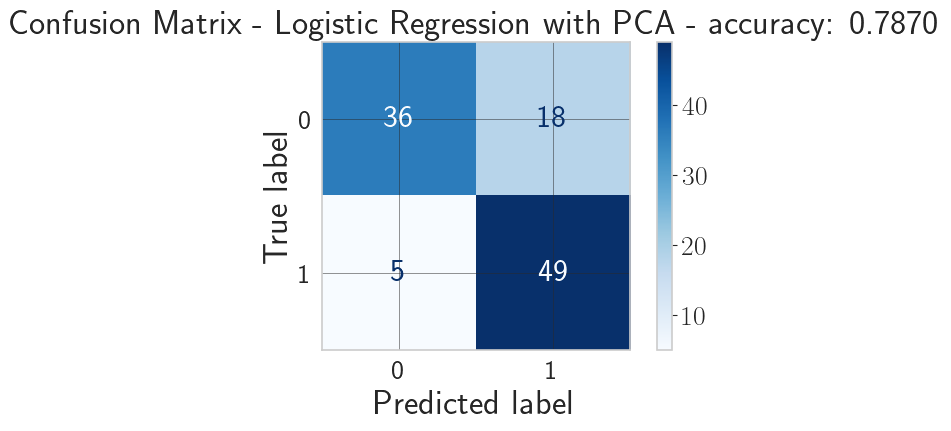

In [8]:
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
# Display the confusion matrix
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix - Logistic Regression with PCA - accuracy: {accuracy_score(y_test, y_pred_best):.4f}')
plt.tight_layout()
plt.show()